In [ ]:
"""Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations 
using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values 
and/or inconsistencies, use any of the suitable techniques to deal with them. 

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
techniques to deal with them. 

3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to 
decrease the skewness and convert the distribution into a normal distribution. 
Reason and document your approach properly.

"""

In [73]:
import pandas as pd
import numpy as np

# Creating the dataset
student_data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['John', 'Jane', 'Bob', 'Alice', 'Mike', 'Emma', 'Eve', 'Daniel', 'Emily', 'Jacob'],
    'Age': [16, 17, 18, 18, 19, 19, 20, 21, 21, 22],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M'],
    'Grade': [80, 75, 90, 85, 75, 90, 80, 95, 75, 85],
    'Test_1': [90, np.nan, 85, 80, 75, np.nan, 70, np.nan, 65, 60],
    'Test_2': [80, 75, 70, 75, 80, 85, 90, 95, 100, np.nan]
}

In [74]:
data=pd.DataFrame(student_data)
data

,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2
0,1,John,16,M,80,90.0,80.0
1,2,Jane,17,F,75,NaN,75.0
2,3,Bob,18,M,90,85.0,70.0
3,4,Alice,18,F,85,80.0,75.0
4,5,Mike,19,M,75,75.0,80.0
5,6,Emma,19,F,90,NaN,85.0
6,7,Eve,20,F,80,70.0,90.0
7,8,Daniel,21,M,95,NaN,95.0
8,9,Emily,21,F,75,65.0,100.0
9,10,Jacob,22,M,85,60.0,NaN


In [96]:
data.to_csv('student_data.csv', index=False)

data=pd.read_csv("student_data.csv")


In [95]:
# Task -1 
#  Scan all variables for missing values and inconsistencies. If there are missing values 
# and/or inconsistencies, use any of the suitable techniques to deal with them. 

# Checking for missing values
print(data.isnull().sum())

Student_ID        0
Name              0
Age               0
Gender            0
Grade             0
Test_1            0
Test_2            0
Percentage        0
Classification    1
dtype: int64


In [18]:
# The dropna() method removes any rows that contain at least one missing value, 
# resulting in a new DataFrame that only contains rows with complete data

# Drop rows with missing values
data = data.dropna()

# Show the resulting DataFrame
print(data)

   Student_ID   Name  Age Gender  Grade  Test_1  Test_2
0           1   John   16      M     80    90.0    80.0
2           3    Bob   18      M     90    85.0    70.0
3           4  Alice   18      F     85    80.0    75.0
4           5   Mike   19      M     75    75.0    80.0
6           7    Eve   20      F     80    70.0    90.0
8           9  Emily   21      F     75    65.0   100.0


In [24]:
# Remove rows where all values are missing
data_dropped_all = data.dropna(how='all')

# Show the resulting DataFrame
print(data_dropped_all)

   Student_ID    Name  Age Gender  Grade  Test_1  Test_2
0           1    John   16      M     80    90.0    80.0
1           2    Jane   17      F     75     NaN    75.0
2           3     Bob   18      M     90    85.0    70.0
3           4   Alice   18      F     85    80.0    75.0
4           5    Mike   19      M     75    75.0    80.0
5           6    Emma   19      F     90     NaN    85.0
6           7     Eve   20      F     80    70.0    90.0
7           8  Daniel   21      M     95     NaN    95.0
8           9   Emily   21      F     75    65.0   100.0
9          10   Jacob   22      M     85    60.0     NaN


In [25]:
# Remove rows where either 'Test_1' or 'Test_2' values are missing
data_dropped_subset = data.dropna(subset=['Test_1', 'Test_2'])

# Show the resulting DataFrame
print(data_dropped_subset)


   Student_ID   Name  Age Gender  Grade  Test_1  Test_2
0           1   John   16      M     80    90.0    80.0
2           3    Bob   18      M     90    85.0    70.0
3           4  Alice   18      F     85    80.0    75.0
4           5   Mike   19      M     75    75.0    80.0
6           7    Eve   20      F     80    70.0    90.0
8           9  Emily   21      F     75    65.0   100.0


In [54]:
# Remove rows with less than 7 non-NA values
data_dropped_thresh = data.dropna(thresh=7)

# Show the resulting DataFrame
print(data_dropped_thresh)


   Student_ID   Name  Age Gender  Grade  Test_1  Test_2
0           1   John   16      M     80    90.0    80.0
2           3    Bob   18      M     90    85.0    70.0
3           4  Alice   18      F     85    80.0    75.0
4           5   Mike   19      M     75    75.0    80.0
6           7    Eve   20      F     80    70.0    90.0
8           9  Emily   21      F     75    65.0   100.0


In [55]:
# Remove rows with any missing values in place
# modify the original DataFrame
data.dropna(inplace=True)

# Show the modified DataFrame
print(data)


   Student_ID   Name  Age Gender  Grade  Test_1  Test_2
0           1   John   16      M     80    90.0    80.0
2           3    Bob   18      M     90    85.0    70.0
3           4  Alice   18      F     85    80.0    75.0
4           5   Mike   19      M     75    75.0    80.0
6           7    Eve   20      F     80    70.0    90.0
8           9  Emily   21      F     75    65.0   100.0


In [81]:
# To add a new column with the percentage of the total score (sum of Test_1 and Test_2) for each student
# Calculate the total score for each student

total_score = data['Test_1'].fillna(0) + data['Test_2'].fillna(0)

print(total_score)

# Calculate the percentage of the total score for each student
percentage = (total_score/2)

# Add the percentage column to the DataFrame
data['Percentage'] = percentage

# Show the updated DataFrame
print(data)

0    170.0
1    162.5
2    155.0
3    155.0
4    155.0
5    157.5
6    160.0
7    162.5
8    165.0
9     60.0
dtype: float64
   Student_ID    Name  Age Gender  Grade  Test_1  Test_2  Percentage
0           1    John   16      M     80    90.0    80.0       85.00
1           2    Jane   17      F     75    87.5    75.0       81.25
2           3     Bob   18      M     90    85.0    70.0       77.50
3           4   Alice   18      F     85    80.0    75.0       77.50
4           5    Mike   19      M     75    75.0    80.0       77.50
5           6    Emma   19      F     90    72.5    85.0       78.75
6           7     Eve   20      F     80    70.0    90.0       80.00
7           8  Daniel   21      M     95    67.5    95.0       81.25
8           9   Emily   21      F     75    65.0   100.0       82.50
9          10   Jacob   22      M     85    60.0     NaN       30.00


In [62]:
data['Test_1'].count() # count non null rows


7

In [66]:
# .fillna() is a method in Pandas that allows you to fill missing or null values in a DataFrame or Series with a specified value or method. Here are some commonly used .fillna() methods:

# 1. fill with a scalar value: 
    # This method replaces all missing or null values in a DataFrame or Series with a scalar value such as 0, "missing", or "unknown". 
    # For example, to fill missing values in a column called "Test_1" with 0.
    
data['Test_1'].fillna(0, inplace=True)

data



,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2,Percentage
0,1,John,16,M,80,90.0,80.0,85.0
1,2,Jane,17,F,75,0.0,75.0,37.5
2,3,Bob,18,M,90,85.0,70.0,77.5
3,4,Alice,18,F,85,80.0,75.0,77.5
4,5,Mike,19,M,75,75.0,80.0,77.5
5,6,Emma,19,F,90,0.0,85.0,42.5
6,7,Eve,20,F,80,70.0,90.0,80.0
7,8,Daniel,21,M,95,0.0,95.0,47.5
8,9,Emily,21,F,75,65.0,100.0,82.5
9,10,Jacob,22,M,85,60.0,NaN,30.0


In [71]:
# fill with a method: 
#     You can use various statistical methods to fill missing values in a DataFrame or Series such as mean, median, or mode. 
#     For example, to fill missing values in a column called "Test_2" with the mean value
data['Test_2'].fillna(data['Test_2'].mean(), inplace=False)



0     80.000000
1     75.000000
2     70.000000
3     75.000000
4     80.000000
5     85.000000
6     90.000000
7     95.000000
8    100.000000
9     83.333333
Name: Test_2, dtype: float64

In [77]:
# forward fill: This method fills missing or null values in a DataFrame or Series with the previous non-null value. 
#    For example, to fill missing values in a column called "Test_1" with the previous non-null value.

data['Test_1'].fillna(method='ffill', inplace=False)




0    90.0
1    85.0
2    85.0
3    80.0
4    75.0
5    70.0
6    70.0
7    65.0
8    65.0
9    60.0
Name: Test_1, dtype: float64

In [78]:

# backward fill
data['Test_1'].fillna(method='bfill', inplace=False)  


0    90.0
1    85.0
2    85.0
3    80.0
4    75.0
5    70.0
6    70.0
7    65.0
8    65.0
9    60.0
Name: Test_1, dtype: float64

In [82]:
# interpolate: 
    # This method fills missing or null values in a DataFrame or Series with interpolated values based on the surrounding data points.
    
data['Test_1'].interpolate(inplace=True)
data

,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2,Percentage
0,1,John,16,M,80,90.0,80.0,85.00
1,2,Jane,17,F,75,87.5,75.0,81.25
2,3,Bob,18,M,90,85.0,70.0,77.50
3,4,Alice,18,F,85,80.0,75.0,77.50
4,5,Mike,19,M,75,75.0,80.0,77.50
5,6,Emma,19,F,90,72.5,85.0,78.75
6,7,Eve,20,F,80,70.0,90.0,80.00
7,8,Daniel,21,M,95,67.5,95.0,81.25
8,9,Emily,21,F,75,65.0,100.0,82.50
9,10,Jacob,22,M,85,60.0,NaN,30.00


In [94]:
# classify = lambda x: "First Class" if x > 80 else ""

# # Add a new column "Classification" based on "Percentage"
# data["Classification"] = data["Percentage"].apply(classify)

def classify_percentage(x):
    if x > 90:
        return "First Class"
    elif x>=80 and x<=90:
        return "Second class"
    elif x>50 and x<80:
        return "Third class"
    elif x<50:
        return np.nan  # adding null values

# Add a new column "Classification" based on "Percentage"
data["Classification"] = data["Percentage"].apply(classify_percentage)

# Print the updated dataframe
data

,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2,Percentage,Classification
0,1,John,16,M,80,90.0,80.000000,85.00,Second class
1,2,Jane,17,F,75,87.5,75.000000,81.25,Second class
2,3,Bob,18,M,90,85.0,70.000000,77.50,Third class
3,4,Alice,18,F,85,80.0,75.000000,77.50,Third class
4,5,Mike,19,M,75,75.0,80.000000,77.50,Third class
5,6,Emma,19,F,90,72.5,85.000000,78.75,Third class
6,7,Eve,20,F,80,70.0,90.000000,80.00,Second class
7,8,Daniel,21,M,95,67.5,95.000000,81.25,Second class
8,9,Emily,21,F,75,65.0,100.000000,82.50,Second class
9,10,Jacob,22,M,85,60.0,83.333333,30.00,NaN


In [92]:
# Imputing missing values
# imputation (filling in the missing values with a mean or median value) or deletion (removing the rows with missing values). 
# In this case, since there are only a few missing values, we will 
# use imputation with the mean value for the 'Test_1' and 'Test_2' columns."""

data['Test_1'].fillna(data['Test_1'].mean(), inplace=True)
data['Test_2'].fillna(data['Test_2'].mean(), inplace=True)

In [8]:
data

,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2
0,1,John,16,M,80,90.0,80.000000
1,2,Jane,17,F,75,75.0,75.000000
2,3,Bob,18,M,90,85.0,70.000000
3,4,Alice,18,F,85,80.0,75.000000
4,5,Mike,19,M,75,75.0,80.000000
5,6,Emma,19,F,90,75.0,85.000000
6,7,Eve,20,F,80,70.0,90.000000
7,8,Daniel,21,M,95,75.0,95.000000
8,9,Emily,21,F,75,65.0,100.000000
9,10,Jacob,22,M,85,60.0,83.333333


In [9]:
data['Test_1'].mean()

75.0

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['Student_ID', 'Age', 'Grade', 'Test_1', 'Test_2', 'Grade_log'], dtype='object')

In [ ]:
# Task 2

# Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
# techniques to deal with them.



In [97]:
# Checking for outliers
df=data
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers found in {col}: {outliers}")

Outliers found in Percentage:    Student_ID   Name  Age Gender  Grade  Test_1     Test_2  Percentage  \
9          10  Jacob   22      M     85    60.0  83.333333        30.0   

  Classification  
9            NaN  


In [99]:
def age_group(age):
    if age >= 16 and age <= 18:
        return "Teen"
    elif age >= 19 and age <= 21:
        return "Young Adult"
    else:
        return "Adult"
    
df["Age Group"] = df["Age"].apply(age_group)

df


,Student_ID,Name,Age,Gender,Grade,Test_1,Test_2,Percentage,Classification,Age Group
0,1,John,16,M,80,90.0,80.000000,85.00,Second class,Teen
1,2,Jane,17,F,75,87.5,75.000000,81.25,Second class,Teen
2,3,Bob,18,M,90,85.0,70.000000,77.50,Third class,Teen
3,4,Alice,18,F,85,80.0,75.000000,77.50,Third class,Teen
4,5,Mike,19,M,75,75.0,80.000000,77.50,Third class,Young Adult
5,6,Emma,19,F,90,72.5,85.000000,78.75,Third class,Young Adult
6,7,Eve,20,F,80,70.0,90.000000,80.00,Second class,Young Adult
7,8,Daniel,21,M,95,67.5,95.000000,81.25,Second class,Young Adult
8,9,Emily,21,F,75,65.0,100.000000,82.50,Second class,Young Adult
9,10,Jacob,22,M,85,60.0,83.333333,30.00,NaN,Adult


C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


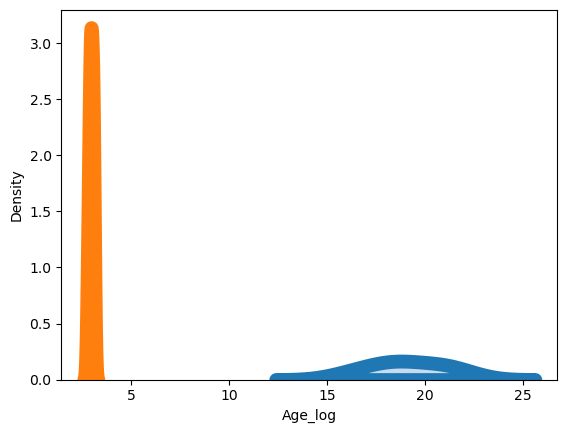

In [103]:
# Applying log transformation
df['Age_log'] = np.log(df['Age'])

# Checking the distribution before and after transformation
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Age'], hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 10})
sns.distplot(df['Age_log'], hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 10})
plt.show()